# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

I start by understanding the dataset, then I clean the data to prepare it for analysis.

I explored the data to understand its behavior and prepare it for clustering by removing stop words, white spaces, and numbers. I used the silhouette and k-means elbow methods to determine the optimal number of clusters. Then, I build a recommender system using cosine similarity to recommend the top ten movies."

# **GitHub Link -**

https://github.com/AshwiniSuryakar09/Netflix-Movies-and-Tv-Shows

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, required to do:

* Exploratory Data Analysis.

* Understanding what type content is available in different countries.

* Is Netflix has increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset

# Read the Excel file
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')




### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

* The Netflix dataset consists of tv shows and movies available on Netflix as of 2019.
* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include= 'all')

### Variables Description

### **The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).**

Attribute Information :

* show_id: Unique Id number for all the listed rows

* type: denotes type of show namely TV Show or Movie

* title: title of the movie

* director: Name of director/directors

* cast: lists the cast of the movie

* country: country of the production house

* date_added: the date the show was added

* release_year: year of the release of the show

* rating: show ratings

* duration: duration of the show

* listed_in: the genre of the show

* description: summary/ description of the movie

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
data = df.copy()

In [ ]:
# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Not available')

In [ ]:
# Filling contry null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
data['country'] = data['country'].fillna(value='Not Known')
# data['country'] = data['country'].fillna(value=data['country'].mode())

In [ ]:
# Since date_added and rating have low number of missing values, that are 10 and 7 respectively, i have dropping the same
data = data.dropna(subset=['date_added','rating'])

In [ ]:
# Since director have many null values if we drop them, we loss a lot data so, i replacing them with unknown.
data['director'] = data['director'].fillna(value='Unknown')

In [ ]:
# Checking missing values again for confirmation
data.isna().sum()

### What all manipulations have you done and insights you found?

**To make the data analysis ready i have done the following:**

1.Filled missing values of cast with Not available.

2.Filled missing values of country with Not Known.

3.Dropped rows of date_added missing values.

4.Dropped rows of ratings missing values.

5.Dropped the entire column of director as it had much number of missing values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Movie vs TV Show Share
spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, i have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know that the types of shows available in netflix is not even with high count for TV shows. 69.14% of the data belongs to movies and 30.86% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2 : Distribution of Various Ratings

In [ ]:
# Chart - 2 :Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data, palette=['#564d4d', '#db0000'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.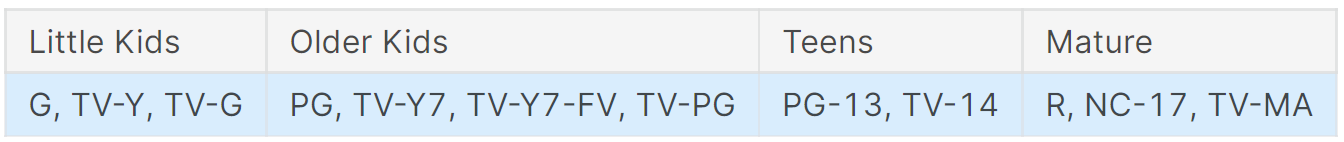**

Yes, from above insight we got to know:

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

#### Chart - 3

In [ ]:
# Chart - 3 : Count Plot Visualization Code for Content Produced by Different Countries
# Not Taking Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#564d4d', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we found that the content belongs to United States alone is 2546 (Movie: 1847, TV Show: 699) and followed by India is 923 (Movie: 852, TV Show: 71).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:

The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Netflix is a US company.

The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### Chart - 4

In [ ]:
# Create New DataFrames for Movie and TV Show Release
release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index().rename(columns={'release_year':'year','index':'count'}) # Fixed: Rename 'release_year' to 'year'

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index().rename(columns={'release_year':'year', 'index':'count'}) # Fixed: Rename 'release_year' to 'year'

#bLine Plot Visualization Code for Content Released Over The Years
movie_year['year'] = pd.to_numeric(movie_year['year'], errors='coerce')
show_year['year'] = pd.to_numeric(show_year['year'], errors='coerce')
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='year', y='count', color='#db0000', label='Movie')

# Plot the line for TV shows
sns.lineplot(data=show_year, x='year', y='count', color='#564d4d', label='TV Show')

# Set Labels
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()

In [ ]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years i have used line plot here.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the content on netflix are of the release date from 2010 to 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

* Growth in the number of movies on Netflix is much higher than tv shows.
* Most of the content available was released between 2010 and 2020.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### Chart - 5

In [ ]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)
df_movies.head()

In [ ]:
#Histogram Visualization Code for Duration Distribution of Netflix Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()


##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

On netflix most of the movies last for 90 to 120 minutes.
So for target audience, movies duration will be greater than minimum 90 minutes.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.

##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

Most repeated words in title include Christmas, Love, World, Man, and Story.
We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

#### Chart - 7

In [ ]:
#Count Plot Visualization Code for Top 10 Directors on Netflix
directors = data[data.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Set Labels and Ploting Graph for Top 10 Directors
top_directors = directors.value_counts().head(10)
# Convert the 'directors' Series to a categorical type with unique categories
directors_categorical = pd.Categorical(directors, categories=top_directors.index)
sns.countplot(y = directors_categorical, order=top_directors.index, palette='Reds_r') # Use the index of top_directors for ordering
plt.title('Top 10 Directors on Netflix')


# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix is Jan Sutar and followed by Raúl Campos and Marcus Raboy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows are available in netflix.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

#### Chart - 8

In [ ]:
# Count Plot Visualization Code for Top 10 Genres on Netflix
# Separate genres and count occurrences
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Plot graph for top 10 genres
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.head(10), y=genre_counts.head(10).index, palette="Reds_r")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')

# Display chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies.

#### Chart - 9

In [ ]:
#Count Plot Visualization Code for Top 10 Actors on Netflix
actor = data[data.cast != 'Not available'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Reset the index of the 'actor' Series and drop the old index
actor = actor.reset_index(drop=True)

# Set Labels and Ploting Graph for Top 10 Actors
plt.figure(figsize=(10,5))
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Actors on Netflix')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most popular actors with most content in netflix are Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and followed by Om Puri and Takahiro Sakurai.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

* That the actors in the top ten list of most numbers tv shows and movies are from India.
* Anupam Kher and Shah Rukh Khan have 30 above content alone in netflix.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Drop Temporary Required month_added Column First
if 'month_added' in data.columns:
  data = data.drop(['month_added'], axis=1)


# Correlation Heatmap Visualization Code
numerical_data = data.select_dtypes(include=['float', 'int'])
corr_matrix = numerical_data.corr()

# Plot Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.


##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of int type, we are unable to visualize the Correlation Matrix heatmap.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define two hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

* Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.
* The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

### Hypothetical Statement - 1

Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : H0 :μunitedstates=μIndia

Alternative Hypothesis :​H1:μunitedstates >μIndia

​Test Type: Two-sample t-test


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
df_movies = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")



##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : H0 :μunitedstates=μIndia

Alternative Hypothesis :​H1:μunitedstates >μIndia

​Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = data[data['type'] == 'Movie'].count()['type']
n_tv_shows = data[data['type'] == 'TV Show'].count()['type']
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(data), len(data)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sum()


### 2. Handling Outliers

(Most of the columns are categorical, so no outliers observed)

### 3. Categorical Encoding

(No need as the data is categorical)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']


In [ ]:
# Cross checking our result for the function created
print(data['tags'][0])

#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'][0])

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'][0])

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'][0])

In [ ]:
# Remove White spaces
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'][0])

#### 6. Rephrase Text

### (Not required)

In [ ]:
# Rephrase Text
# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# data['tags'] = data['tags'].apply(rephrase_tags)

#### 7. Tokenization

In [ ]:
# Tokenization
# Loading Libraries
import nltk
nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(data['tags'][0])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = data['tags']

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][0])

##### Which text normalization technique have you used and why?

Here i use Stemming.

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Stemming is important in natural language processing(NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

SnowballStemmer:

Snowball is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it. It was originally designed and built by Martin Porter. SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
data['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(data['tags'][0])

In [ ]:
# Using this tagset we know that which tag shows which type of POS
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset()

In [ ]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
data['tags']=data['tags'].apply(sentence)

# Cross-check our result for the function created
print(data['tags'][0])

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# Convert vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)

In [ ]:

print(tfidf.get_feature_names_out())

In [ ]:
vec_data=pd.DataFrame(vector)
vec_data


##### Which text vectorization technique have you used and why?

I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### **5. Feature Manipulation & Selection**

(Not required)

### 6. Data Transformation
(No need to transform this data because this data is in form of Text Vectorization)

### 8. Dimensionality Reduction
Do you think that dimensionality reduction is needed? Explain Why?
Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [ ]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)
### **In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
### **On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [ ]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)
### **In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
### **On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
# Transformed features
X = pca.transform(vector)

### **Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**
We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

## ***7. ML Model Implementation***

### ML Model - 1  : K-Means Clustering (For Metric Distortion)

In [ ]:
# ML Model - 1  Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

# Visualize the elbow method
visualizer.show()

From this plot, we can say that the best k value is 6. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)


Labelling the dataset as per the cluster.

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart


Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

You could pick K random data points and make those your starting points.

Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

The algorithm is said to have “converged” once there are no more changes.

These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?

Here i have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square). i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 :  Hierarchical Clustering (Agglomerative Clustering)

In [ ]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 6.

In [ ]:
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [ ]:
# Adding a new column 'Agg_cluster' in the dataset
data["Agg_cluster"]=y_hc
data.head()

In [ ]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Second chart (Scatter plot Graph) shows the performance of our algorithm. Here we can see the different clusters

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 6.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

## **ML Model - 3 : Silhouette Score for Clustering**

In [ ]:
# ML Model - 3 Implementation

for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

In [ ]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

In [ ]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=data, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

Let's do Cluster Analysis....................

Clustering similar content by matching text-based features

In [ ]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in data[data['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()


# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: united states, documentaries, international movies etc**.

In [ ]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: action adventure, united states, international movies etc.**

In [ ]:
# WordCloud for cluster 2
kmeans_worldcloud(2)


**Keywords observed in cluster 2: united states, standup comedy, comedian, tv etc.**

In [ ]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: international tv, tv show, drama, crime tv etc.**

In [ ]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: international movies, drama, comedies, romantic etc.**

In [ ]:
# WordCloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: united states, children, family, dramas, independent movies etc.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:

# Here i have use topic modeling instead of feature importance and model explainability.
# Model explainability does majory help in classification problem but here is the project of unsupervised ML.
# In topic modeling, we can get topic wise feature importance.

Here i have use topic modeling. Assume that the clusters are topics. Here for topic modeling i use CountVectorizer process for Vectorization of data and i use Latent Dirichlet Allocation for building a topic.

In [ ]:
# Use count vectorization process for our data
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
document_term_matrix=count_vectorizer.fit_transform(data['tags'])

In [ ]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

In [ ]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")


In [ ]:
# Generate WordCloud Images for Given Topics
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

  # Create a String to Store All The Words
  imp_words_topic=""

  # Set Parameters
  comp=lda.components_[topic_num]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  # Set Parameters
  # Use STOPWORDS set from wordcloud library
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(imp_words_topic)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Features in Topic {topic_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  #Display Chart
  plt.show()





In [ ]:
# WordCloud for Topic 0
draw_word_cloud(0)

In [ ]:

# WordCloud for Topic 1
draw_word_cloud(1)

In [ ]:
# WordCloud for Topic 2
draw_word_cloud(2)

In [ ]:

# WordCloud for Topic 3
draw_word_cloud(3)

In [ ]:
# WordCloud for Topic 4
draw_word_cloud(4)

In [ ]:
# WordCloud for Topic 5
draw_word_cloud(5)


Here from those wordcloud plots we can know which word is important for which cluster. We can also decide the name of Topics (Clusters) from this plots.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

* Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

* The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

* To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 9000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 80% of the variance by reducing the components to 2500.

* Next, i used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 5.

* In Agglomerative clustering the optimal number of clusters was also 6, which we visualized with a dendrogram.

* Continued all the efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity.

The recommender system offers personalized recommendations based on the type of shows the user has watched and provides the user with ten top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***